In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [2]:
inter_dim1 = 128
inter_dim2 = 32
latent_dim = 10
EPOCH = 30
learning_rate = 0.005

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
class Autoencoder(Model):
    def __init__(self, encoding_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
          layers.Input(shape=(28,28)),
          layers.Flatten(),
          layers.Dense(inter_dim1, activation='relu'),
          layers.Dense(inter_dim2, activation='relu'),
          layers.Dense(latent_dim),
        ])
        self.decoder = tf.keras.Sequential([
        layers.Input(shape=(latent_dim,)),
        layers.Dense(inter_dim2, activation='relu'),
        layers.Dense(inter_dim1, activation='relu'),
        layers.Dense(28*28, activation='sigmoid'),
        layers.Reshape((28, 28))
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(latent_dim)

In [5]:
autoencoder.encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [6]:
autoencoder.decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                352       
                                                                 
 dense_4 (Dense)             (None, 128)               4224      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 105,712
Trainable params: 105,712
Non-trainable params: 0
_________________________________________________________________


In [7]:
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss=losses.MeanSquaredError())

In [8]:
history = autoencoder.fit(x_train, x_train,
                epochs=EPOCH,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
1875/1875 [==============================] - 10s 4ms/step - loss: 0.0304 - val_loss: 0.0218
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0209 - val_loss: 0.0194
Epoch 3/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0195 - val_loss: 0.0187
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0188 - val_loss: 0.0184
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0184 - val_loss: 0.0179
Epoch 6/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0180 - val_loss: 0.0175
Epoch 7/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0178 - val_loss: 0.0176
Epoch 8/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0176 - val_loss: 0.0177
Epoch 9/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0174 - val_loss: 0.0174
Epoch 10/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.

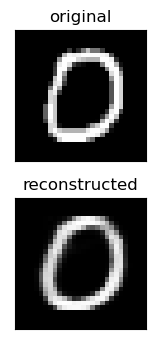

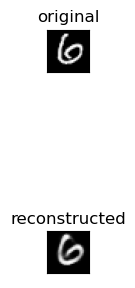

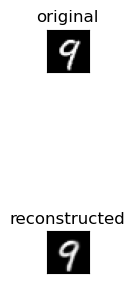

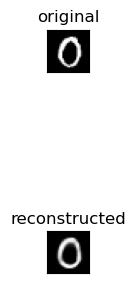

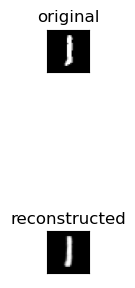

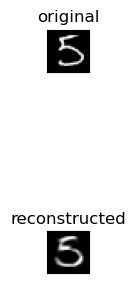

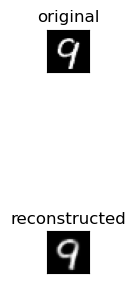

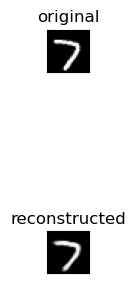

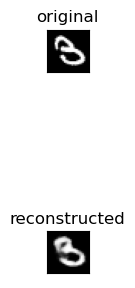

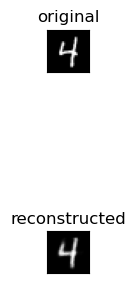

In [12]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i+10])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i+10])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()

In [10]:
losses = history.history['loss']
test_losses = history.history['val_loss']

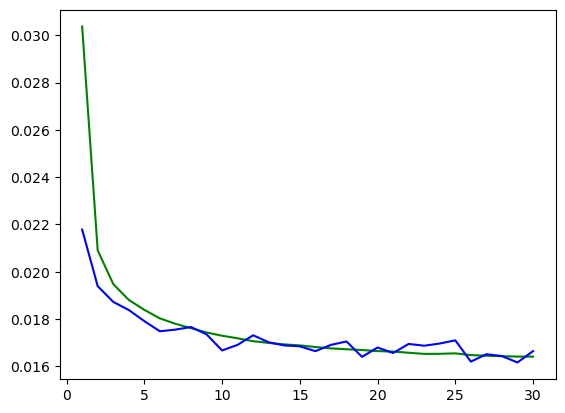

In [11]:
x = range(1,31)
plt.plot(x, losses, 'g', x, test_losses, 'b')
